# ALeRCE testing dust maps

```Author: Alejandra Muñoz Arancibia```

ALeRCE notebook

Testing `dustmaps` module (https://dustmaps.readthedocs.io/en/latest/) use for obtaining $E(B-V)$ (and later $A_{\lambda}$ values) at different coordinates.

Note $R_V=A_V/E(B-V)$, $E(B-V)=A_B-A_V$

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astroquery.irsa_dust import IrsaDust
from dustmaps.sfd import SFDQuery
from dustmaps.config import config
from dust_extinction.parameter_averages import F19
import extinction

In [3]:
from alerce.core import Alerce
client = Alerce()

In [4]:
# Color blind friendly green and red 
colors = {1: '#56E03A', 2: '#D42F4B'}

## Extinction curves

$A_{\lambda}/A_V$ as a function of $1/\lambda$ in $\mu$m$^{-1}$ for several extinction curves. Dashed vertical lines indicate $1/\lambda$ for g and r SDSS filters. Extinction curves from `extinction` module (https://extinction.readthedocs.io/en/latest/): Cardelli, Clayton & Mathis (1989), O'Donnell (1994), Fitzpatrick (1999), Fitzpatrick & Massa (2007). From `dust_extinction` module (https://dust-extinction.readthedocs.io/en/stable/): Fitzpatrick et al. (2019).

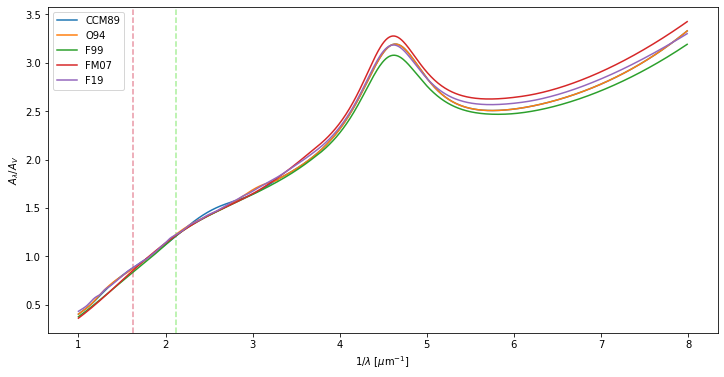

In [5]:
lam = np.array([4716.7, 6165.1]) # In Angstrom
x_lam = 1.e4/lam # In um^{-1}

t = np.arange(1, 8, 0.01)
rv = 3.1
av = 1.

# Cardelli, Clayton & Mathis (1989)
alam_av_ccm89 = extinction.ccm89(t, av, rv, unit='invum')

# O'Donnell (1994)
alam_av_o94 = extinction.odonnell94(t, av, rv, unit='invum')

# Fitzpatrick (1999)
alam_av_f99 = extinction.fitzpatrick99(t, av, rv, unit='invum')

# Fitzpatrick & Massa (2007), assumes R_V=3.1
alam_av_fm07 = extinction.fm07(t, av, unit='invum')

# Fitzpatrick et al. (2019)
ext_model = F19(Rv=rv)
alam_av_f19 = ext_model(t/u.micron)

fig, ax = plt.subplots(figsize=(12, 6))

ax.axvline(x=x_lam[0], linestyle='--', color=colors[1], alpha=0.5)
ax.axvline(x=x_lam[1], linestyle='--', color=colors[2], alpha=0.5)

ax.plot(t, alam_av_ccm89, label='CCM89')
ax.plot(t, alam_av_o94, label='O94')
ax.plot(t, alam_av_f99, label='F99')
ax.plot(t, alam_av_fm07, label='FM07')
ax.plot(t, alam_av_f19, label='F19')

ax.set_xlabel('$1/\lambda$ [$\mu$m$^{-1}$]')
ax.set_ylabel('$A_{\lambda}/A_V$')
ax.legend()

Check if $A_{\lambda}/A_V$ for $\lambda=V$ is or not 1  for the extinction curves

In [6]:
x_v = np.array([1./0.54217]) # In um^{-1}
rv = 3.1
av = 1.

ratio1_av_ccm89 = extinction.ccm89(x_v, av, rv, unit='invum')
ratio1_av_o94 = extinction.odonnell94(x_v, av, rv, unit='invum')
ratio1_av_f99 = extinction.fitzpatrick99(x_v, av, rv, unit='invum')
ratio1_av_fm07 = extinction.fm07(x_v, av, unit='invum')
ext_model = F19(Rv=rv)
ratio1_av_f19 = ext_model(x_v/u.micron)
print('x for V filter', x_v)
print('A_V/A_V for CCM89', ratio1_av_ccm89)
print('A_V/A_V for O94', ratio1_av_o94)
print('A_V/A_V for F99', ratio1_av_f99)
print('A_V/A_V for FM07', ratio1_av_fm07)
print('A_V/A_V for F19', ratio1_av_f19)

x for V filter [1.84443994]
A_V/A_V for CCM89 [1.01561141]
A_V/A_V for O94 [1.01811853]
A_V/A_V for F99 [0.99787074]
A_V/A_V for FM07 [1.02726426]
A_V/A_V for F19 [1.01915753]


Conversion factors for g and r SDSS filters from Table 6 of Schlafly & Finkbeiner (2011, SF11) with $R_V=3.1$ (https://iopscience.iop.org/article/10.1088/0004-637X/737/2/103#apj398709t6)

In [7]:
alam_ebv_sf11 = np.array([3.303, 2.285]) # g and r SDSS filters, R_V=3.1
#alam_ebv_sf11 = np.array([3.843, 2.255]) # g and r SDSS filters, R_V=2.1
#alam_ebv_sf11 = np.array([3.054, 2.300]) # g and r SDSS filters, R_V=4.1
#alam_ebv_sf11 = np.array([2.910, 2.308]) # g and r SDSS filters, R_V=5.1

Conversion factors for g and r SDSS filters following Cardelli, Clayton & Mathis (1989, CCM89) with $R_V=3.1$, used by Finkbeiner et al. (2004) and SEGUE Stellar Parameter Pipeline (SSPP) from SDSS (https://www.sdss.org/dr16/spectro/sspp/)

In [8]:
alam_ebv_ccm89_f04 = np.array([3.793, 2.751]) # g and r SDSS filters, R_V=3.1

Conversion factors for g and r SDSS filters using extinction curves from `extinction` and `dust_extinction` modules

In [9]:
lam = np.array([4716.7, 6165.1]) # In Angstrom
x_lam = 1.e4/lam # In um^{-1}
rv = 3.1
av = 1.

alam_ebv_ccm89_test = extinction.ccm89(x_lam, av, rv, unit='invum')*rv
alam_ebv_o94_test = extinction.odonnell94(x_lam, av, rv, unit='invum')*rv
alam_ebv_f99_test = extinction.fitzpatrick99(x_lam, av, rv, unit='invum')*rv
alam_ebv_fm07_test = extinction.fm07(x_lam, av, unit='invum')*rv
ext_model = F19(Rv=rv)
alam_ebv_f19_test = ext_model(x_lam/u.micron)*rv

print('x for g and r filters', x_lam)
print('A_g/E(B-V) and A_r/E(B-V) for CCM89', alam_ebv_ccm89_test)
print('A_g/E(B-V) and A_r/E(B-V) for O94', alam_ebv_o94_test)
print('A_g/E(B-V) and A_r/E(B-V) for F99', alam_ebv_f99_test)
print('A_g/E(B-V) and A_r/E(B-V) for FM07', alam_ebv_fm07_test)
print('A_g/E(B-V) and A_r/E(B-V) for F19', alam_ebv_f19_test)

x for g and r filters [2.12012636 1.62203371]
A_g/E(B-V) and A_r/E(B-V) for CCM89 [3.75556275 2.7275504 ]
A_g/E(B-V) and A_r/E(B-V) for O94 [3.80428544 2.69545379]
A_g/E(B-V) and A_r/E(B-V) for F99 [3.75947375 2.58591467]
A_g/E(B-V) and A_r/E(B-V) for FM07 [3.7736057  2.64161057]
A_g/E(B-V) and A_r/E(B-V) for F19 [3.79587409 2.73123141]


## Attenuation for individual objects

$A_{\lambda}$ as a product of $E(B-V)$ (e.g. from `dustmaps`) and conversion factor $A_{\lambda}/E(B-V)$ (e.g. from table)

In [10]:
def alam_fromarrays(ebv, alam_ebv):
    alam = np.outer(ebv, alam_ebv)
    
    if not isinstance(ebv, np.ndarray):
        alam = alam[0]
    
    return alam

Querying ALeRCE data for one object

In [11]:
def getobjdata(oid):
    results = {'oid': oid}
    
    # query basic stats
    obj_stats = client.query_object(oid, format='pandas')
    results['stats'] = obj_stats
    
    return results

In [12]:
seloid = 'ZTF18abnznbm'

In [13]:
results = getobjdata(seloid)

In [14]:
coords = coordinates.SkyCoord(ra=float(results['stats'].meanra), dec=float(results['stats'].meandec),
                              unit=(u.deg, u.deg), frame='icrs')
coords

<SkyCoord (ICRS): (ra, dec) in deg
    (0.07583313, 19.54873922)>

In [15]:
sfd = SFDQuery()
ebv = sfd(coords)
print('E(B-V)=', ebv, '(dustmaps, SFD)')

E(B-V)= 0.0466591 (dustmaps, SFD)


Comparing attenuation values in g and r SDSS filters obtained for a given $E(B-V)$ value (from `dustmaps`) and several extinction curves (or conversion factors derived from them), including `irsa_dust` (https://astroquery.readthedocs.io/en/latest/irsa/irsa_dust.html)

In [16]:
lam = np.array([4716.7, 6165.1]) # In Angstrom
x_lam = 1.e4/lam # In um^{-1}
rv = 3.1
av = rv*ebv

alam_ccm89_test = extinction.ccm89(lam, av, rv)
alam_o94_test = extinction.odonnell94(lam, av, rv)
alam_f99_test = extinction.fitzpatrick99(lam, av, rv)
alam_fm07_test = extinction.fm07(lam, av)
ext_model = F19(Rv=rv)
alam_f19_test = ext_model(x_lam/u.micron)*rv*ebv

print('A_g and A_r for CCM89', alam_ccm89_test)
print('A_g and A_r for O94', alam_o94_test)
print('A_g and A_r for F99', alam_f99_test)
print('A_g and A_r for FM07', alam_fm07_test)
print('A_g and A_r for F19', alam_f19_test)

A_g and A_r for CCM89 [0.17523118 0.12726505]
A_g and A_r for O94 [0.17750454 0.12576745]
A_g and A_r for F99 [0.17541366 0.12065645]
A_g and A_r for FM07 [0.17607305 0.12325517]
A_g and A_r for F19 [0.17711207 0.1274368 ]


In [17]:
att = alam_fromarrays(ebv, alam_ebv_sf11)
print('A_g and A_r for SF11', att)

A_g and A_r for SF11 [0.15411501 0.10661605]


In [18]:
att = alam_fromarrays(ebv, alam_ebv_ccm89_f04)
print('A_g and A_r for CCM89 from SDSS', att)

A_g and A_r for CCM89 from SDSS [0.17697797 0.12835919]


In [19]:
table = IrsaDust.get_extinction_table(coords)
att = [table[table['Filter_name'] == 'SDSS g']['A_SFD'][0],
            table[table['Filter_name'] == 'SDSS r']['A_SFD'][0]]
print('A_g and A_r for irsa_dust, SFD', att)

A_g and A_r for irsa_dust, SFD [0.176, 0.128]


Same for four objects. Note that `irsa_dust` only accepts coordinates for 1 object per query

In [20]:
seloid = [ "ZTF18aajusiz", "ZTF18aalarzm", "ZTF18aapmpdr", "ZTF18aapsyhm"]
noid = len(seloid)

In [21]:
ra = []
dec = []

for oid in seloid:
    results = getobjdata(oid)
    ra.append(float(results['stats'].meanra))
    dec.append(float(results['stats'].meandec))

coords = coordinates.SkyCoord(ra=ra, dec=dec, unit=(u.deg, u.deg), frame='icrs')
coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(256.89132573, 58.84992855), (283.35796987, 43.15455523),
     (289.50205145, 50.7549227 ), (293.25371966, 46.23973228)]>

In [22]:
sfd = SFDQuery()
ebv = sfd(coords)
print('E(B-V)=', ebv, '(dustmaps, SFD)')

E(B-V)= [0.02957845 0.08202397 0.08307542 0.1129406 ] (dustmaps, SFD)


In [23]:
lam = np.array([4716.7, 6165.1]) # In Angstrom
x_lam = 1.e4/lam # In um^{-1}
rv = 3.1
av = 1.

alam_ccm89_test = alam_fromarrays(ebv, extinction.ccm89(lam, av, rv))*rv
alam_o94_test = alam_fromarrays(ebv, extinction.odonnell94(lam, av, rv))*rv
alam_f99_test = alam_fromarrays(ebv, extinction.fitzpatrick99(lam, av, rv))*rv
alam_fm07_test = alam_fromarrays(ebv, extinction.fm07(lam, av))*rv
ext_model = F19(Rv=rv)
alam_f19_test = alam_fromarrays(ebv, ext_model(x_lam/u.micron))*rv

print('A_g and A_r for CCM89', alam_ccm89_test)
print('A_g and A_r for O94', alam_o94_test)
print('A_g and A_r for F99', alam_f99_test)
print('A_g and A_r for FM07', alam_fm07_test)
print('A_g and A_r for F19', alam_f19_test)

A_g and A_r for CCM89 [[0.11108373 0.08067672]
 [0.30804617 0.22372451]
 [0.31199495 0.22659239]
 [0.42415552 0.30805118]]
A_g and A_r for O94 [[0.11252487 0.07972735]
 [0.3120426  0.22109182]
 [0.31604261 0.22392595]
 [0.42965829 0.30442617]]
A_g and A_r for F99 [[0.11119941 0.07648735]
 [0.30836696 0.21210699]
 [0.31231986 0.21482595]
 [0.42459723 0.29205476]]
A_g and A_r for FM07 [[0.11161741 0.07813475]
 [0.30952612 0.21667539]
 [0.31349387 0.21945291]
 [0.4261933  0.29834509]]
A_g and A_r for F19 [[0.11227608 0.08078559]
 [0.31135267 0.22402645]
 [0.31534383 0.22689819]
 [0.4287083  0.30846692]]


In [24]:
for i in range(noid):
    table = IrsaDust.get_extinction_table(coords[i])
    att = [table[table['Filter_name'] == 'SDSS g']['A_SFD'][0],
            table[table['Filter_name'] == 'SDSS r']['A_SFD'][0]]
    print('A_g and A_r for irsa_dust, SFD', att)

A_g and A_r for irsa_dust, SFD [0.112, 0.081]
A_g and A_r for irsa_dust, SFD [0.313, 0.227]
A_g and A_r for irsa_dust, SFD [0.317, 0.23]
A_g and A_r for irsa_dust, SFD [0.424, 0.307]


## Attenuation for a grid of coordinates

In [25]:
def plot_att(att_g, att_r):
    fig = plt.figure(figsize=(12,4), dpi=150)
    
    for k,(att,title) in enumerate([(att_g, '$A_g$'),
                                   (att_r, '$A_r$')]):
        ax = fig.add_subplot(1,2,k+1)
        ax.imshow(
            #np.sqrt(att)[::,::-1],
            att[::,::-1],
            vmin=0.,
            vmax=2.,
            origin='lower',
            interpolation='nearest',
            cmap='binary',
            aspect='equal'
        )
        ax.axis('off')
        ax.set_title(title)
    
    fig.subplots_adjust(wspace=0., hspace=0.)

### Region centered on the Aquila South cloud
Following example in https://dustmaps.readthedocs.io/en/latest/examples.html, Galactic coordinates

In [26]:
l0, b0 = (37., -16.)
l = np.arange(l0 - 5., l0 + 5., 0.05)
b = np.arange(b0 - 5., b0 + 5., 0.05)
l, b = np.meshgrid(l, b)
coords = coordinates.SkyCoord(l*u.deg, b*u.deg, frame='galactic')

In [27]:
ncoords = len(coords)
coords2 = coords.flatten()
ncoords2 = len(coords2)
print('coords side %d, total coords %d' % (ncoords, ncoords2))

coords side 200, total coords 40000


Using $E(B-V)$ from `dustmaps` SFD and conversion factors for g and r SDSS filters following CCM89 with $R_V=3.1$

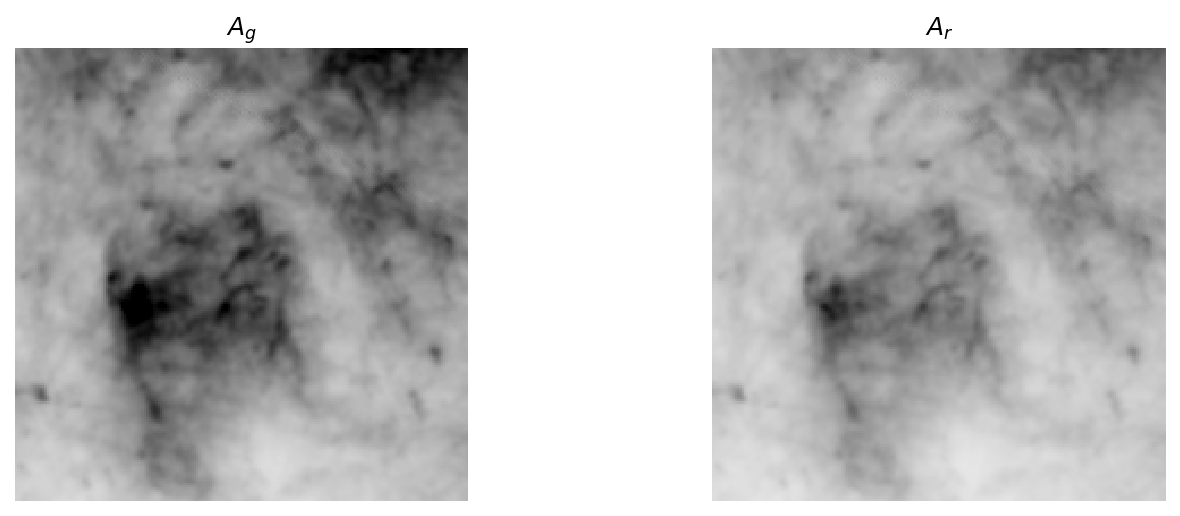

In [28]:
sfd = SFDQuery()
att_g = alam_ebv_ccm89_f04[0]*sfd(coords)
att_r = alam_ebv_ccm89_f04[1]*sfd(coords)
plot_att(att_g, att_r)

### Region with the size of a LSST DDF
9.61 sq deg, Galactic coordinates, using $E(B-V)$ from `dustmaps` SFD and conversion factors for g and r SDSS filters following CCM89 with $R_V=3.1$

In [29]:
#l0, b0 = (0., 0.)
l0, b0 = (30., 20.)
dcoords_l = 1.55
dcoords_b = 1.55
dcoord = 0.015
l = np.arange(l0 - dcoords_l, l0 + dcoords_l, dcoord)
b = np.arange(b0 - dcoords_b, b0 + dcoords_b, dcoord)
l, b = np.meshgrid(l, b)
coords = coordinates.SkyCoord(l*u.deg, b*u.deg, frame='galactic')

In [30]:
coords2 = coords.flatten()
ncoords2 = len(coords2)
ncoords2

42849

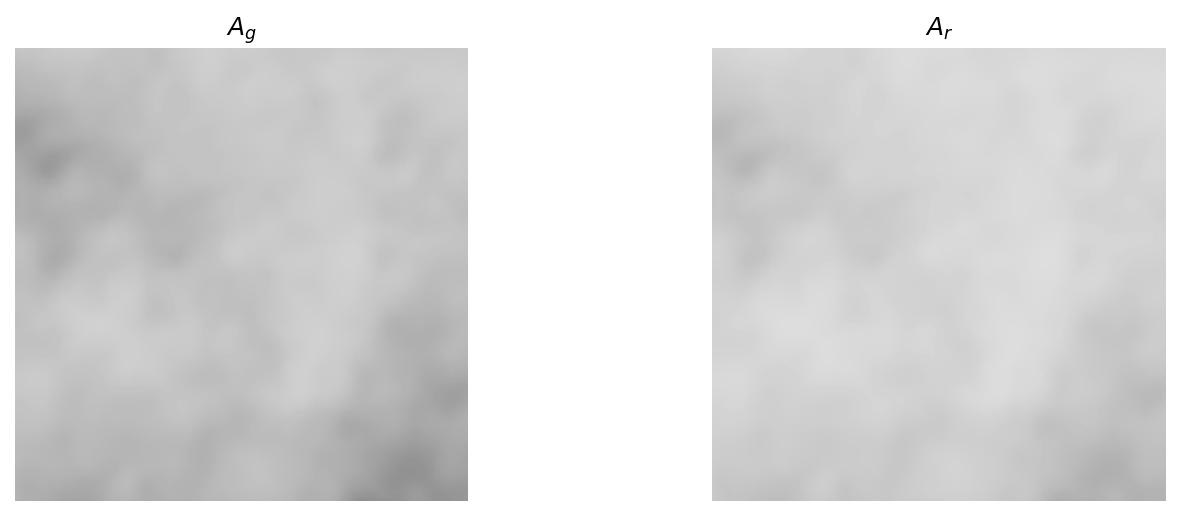

In [31]:
sfd = SFDQuery()
att_g = alam_ebv_ccm89_f04[0]*sfd(coords)
att_r = alam_ebv_ccm89_f04[1]*sfd(coords)
plot_att(att_g, att_r)

### Full sky
Galactic coordinates, using $E(B-V)$ from `dustmaps` SFD and conversion factors for g and r SDSS filters following CCM89 with $R_V=3.1$

In [32]:
l0, b0 = (0., 0.)
dcoords_l = 180.
dcoords_b = 90.
dcoord = 1.
l = np.arange(l0 - dcoords_l, l0 + dcoords_l, dcoord)
b = np.arange(b0 - dcoords_b, b0 + dcoords_b, dcoord)
l, b = np.meshgrid(l, b)
coords = coordinates.SkyCoord(l*u.deg, b*u.deg, frame='galactic')

In [33]:
coords2 = coords.flatten()
ncoords2 = len(coords2)
print('total coords', ncoords2)

total coords 64800


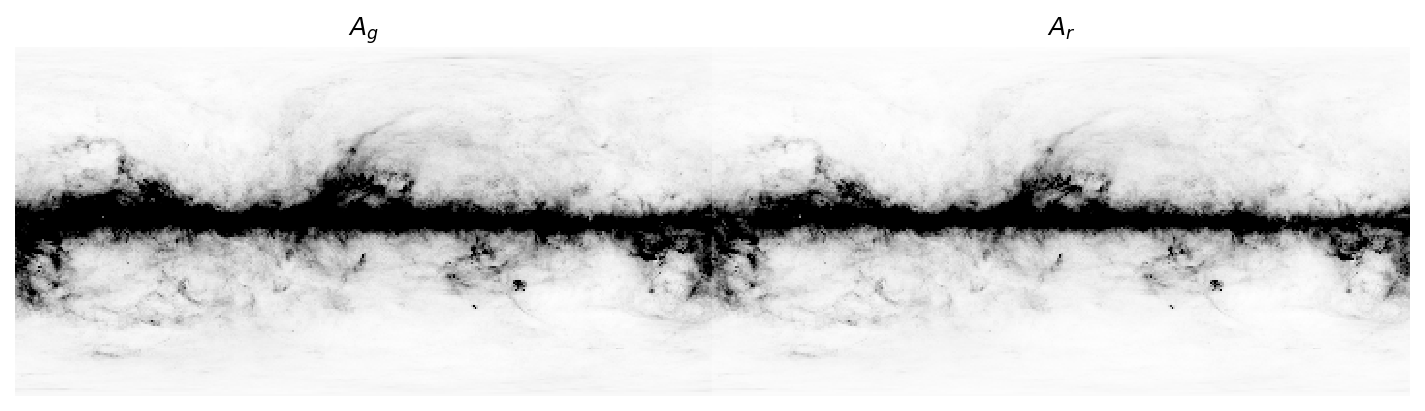

In [34]:
sfd = SFDQuery()
att_g = alam_ebv_ccm89_f04[0]*sfd(coords)
att_r = alam_ebv_ccm89_f04[1]*sfd(coords)
plot_att(att_g, att_r)

Same for CCM89 extinction curves with $R_V=3.1$ from `extinction` for g and r wavelengths

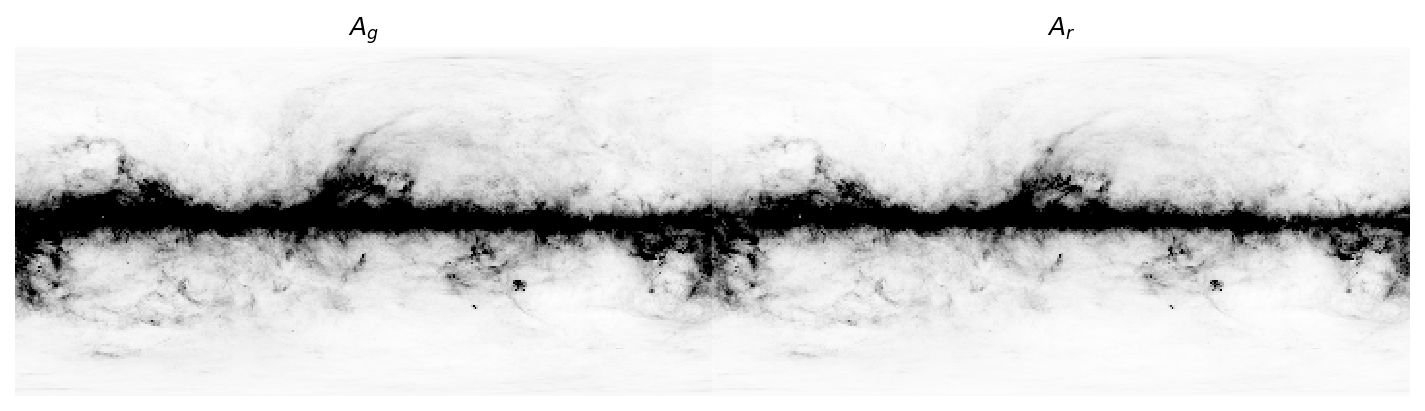

In [35]:
sfd = SFDQuery()
lam = np.array([4716.7, 6165.1]) # In Angstrom
rv = 3.1
av = 1.

alam_ebv_aux = extinction.ccm89(lam, av, rv)*rv
att_g = alam_ebv_aux[0]*sfd(coords)
att_r = alam_ebv_aux[1]*sfd(coords)
plot_att(att_g, att_r)

Same for F19 extinction curves with $R_V=3.1$ from `dust_extinction` for g and r wavelengths

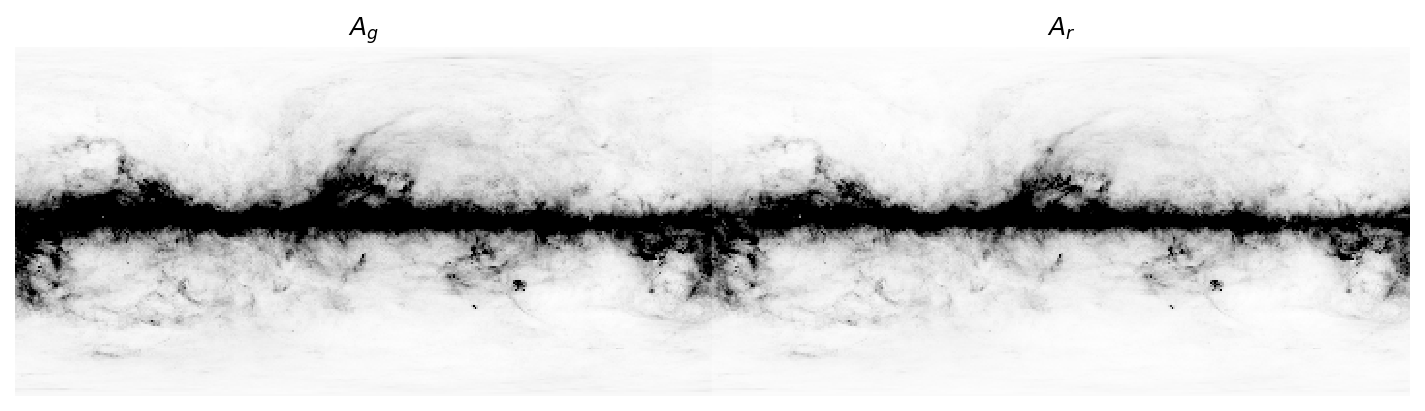

In [36]:
sfd = SFDQuery()
lam = np.array([4716.7, 6165.1]) # In Angstrom
x_lam = 1.e4/lam # In um^{-1}
rv = 3.1
av = 1.

ext_model = F19(Rv=rv)
alam_ebv_aux = ext_model(x_lam/u.micron)*rv
att_g = alam_ebv_aux[0]*sfd(coords)
att_r = alam_ebv_aux[1]*sfd(coords)
plot_att(att_g, att_r)

### Comparison of reading `dustmaps` data from /dev/shm vs config folder (activate Nbextension ExecuteTime)

Full sky, Galactic coordinates, using $E(B-V)$ from `dustmaps` SFD and conversion factors for g and r SDSS filters following CCM89 with $R_V=3.1$

In [37]:
config['data_dir'] = '/dev/shm/'

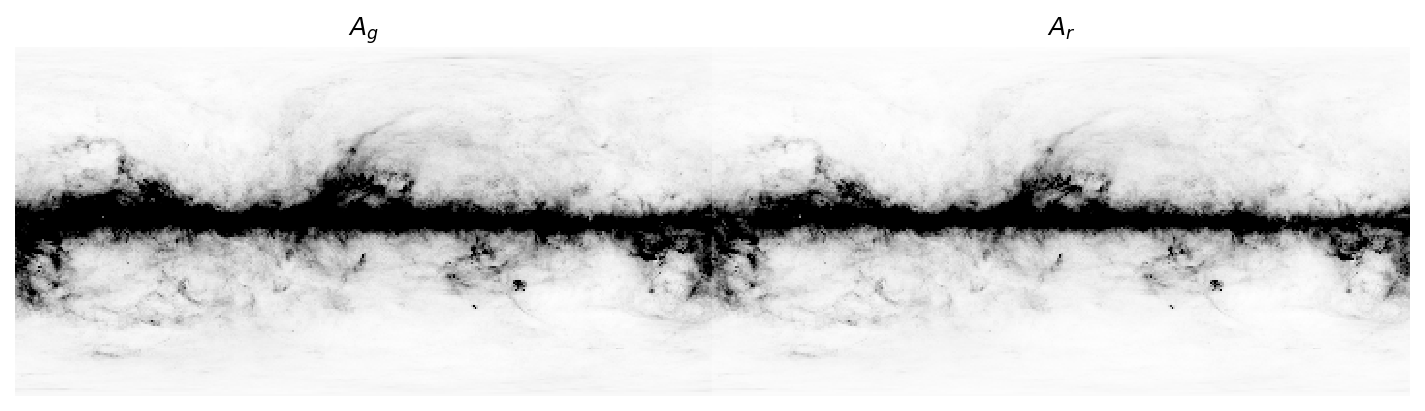

In [38]:
sfd = SFDQuery()
att_g = alam_ebv_ccm89_f04[0]*sfd(coords)
att_r = alam_ebv_ccm89_f04[1]*sfd(coords)
plot_att(att_g, att_r)

In [39]:
config['data_dir'] = '/home/ammunoz1/Desktop/Astro2020/ALeRCE/DustMaps/'

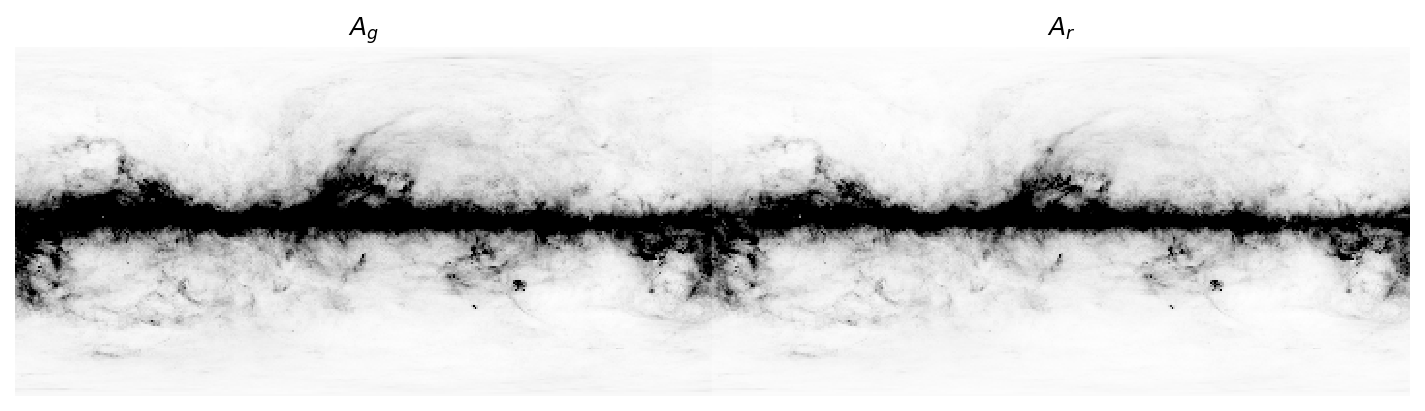

In [40]:
sfd = SFDQuery()
att_g = alam_ebv_ccm89_f04[0]*sfd(coords)
att_r = alam_ebv_ccm89_f04[1]*sfd(coords)
plot_att(att_g, att_r)